# Progetto di esame di marco edoardo santimaria
Url del dataset: http://snap.stanford.edu/data/ca-GrQc.html

In [23]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
collabGraph = nx.read_edgelist("CA-GrQc.txt", comments="#")

## Network metrics section

In [4]:
#number of edges and number of nodes
print("Number of nodes in network: " + str(collabGraph.number_of_nodes()))
print("Number of edges in network: " + str(collabGraph.number_of_edges()))

Number of nodes in network: 5242
Number of edges in network: 14496


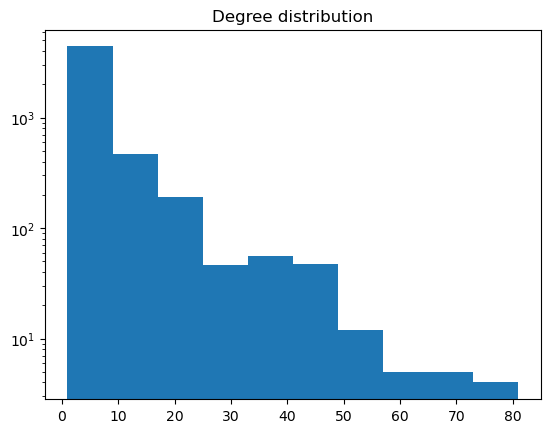

In [5]:
#degree distributions
degrees=[]
for node in collabGraph.nodes():
    degrees.append(collabGraph.degree(node))

plt.hist(degrees, log=True)
plt.title("Degree distribution")
plt.show()


In [6]:
#connected components
cc = nx.connected_components(collabGraph)
ccCount = nx.number_connected_components(collabGraph)

print("There are " + str(ccCount) + " connected components in my graph.")
print("The biggest connected component has size: " + str(max([len(c) for c in cc])))


There are 355 connected components in my graph.
The biggest connected component has size: 4158


Text(0.5, 1.0, 'Size of each connected component')

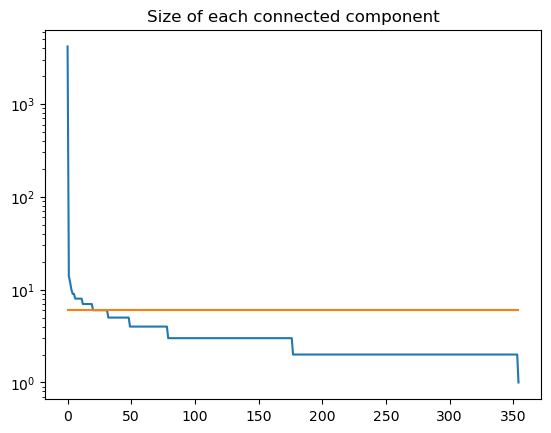

In [7]:
#plotting the size of connected components to identify a good cutoff value
#on x scale i have ache single connected component.
fig,ax = plt.subplots()
ax.plot([len(c) for c in sorted(nx.connected_components(collabGraph), key=len, reverse=True)])
ax.plot([6 for _ in range(ccCount)]) #immaginary cutoff to see at wich point i will cut the components
ax.set_yscale('log')
ax.set_title("Size of each connected component")

#by cutting for sizes of connected components greater than 6, i get around 25 cc

In [8]:
#connected components average degree but only for nodes with size greater than 6

ccCuttedSubGrapghs = [collabGraph.subgraph(c).copy() for c in nx.connected_components(collabGraph) if len(c) > 6]
for c in ccCuttedSubGrapghs:
    print("The average degree for cc of size: " + str(len(c)) + " is: " + str( sum( c.degree(nodes) for nodes in c) / c.number_of_nodes() )   )

The average degree for cc of size: 4158 is: 6.458874458874459
The average degree for cc of size: 10 is: 2.0
The average degree for cc of size: 12 is: 3.3333333333333335
The average degree for cc of size: 7 is: 3.4285714285714284
The average degree for cc of size: 7 is: 2.0
The average degree for cc of size: 14 is: 4.142857142857143
The average degree for cc of size: 8 is: 1.75
The average degree for cc of size: 9 is: 2.6666666666666665
The average degree for cc of size: 7 is: 4.0
The average degree for cc of size: 8 is: 3.25
The average degree for cc of size: 8 is: 6.0
The average degree for cc of size: 8 is: 3.0
The average degree for cc of size: 7 is: 2.2857142857142856
The average degree for cc of size: 8 is: 4.5
The average degree for cc of size: 8 is: 3.5
The average degree for cc of size: 9 is: 4.222222222222222
The average degree for cc of size: 7 is: 3.142857142857143
The average degree for cc of size: 7 is: 2.857142857142857
The average degree for cc of size: 7 is: 2.571428571

In [9]:
#centrality of each node

#closeness centrality
collabCentralityCloseness = nx.closeness_centrality(collabGraph)

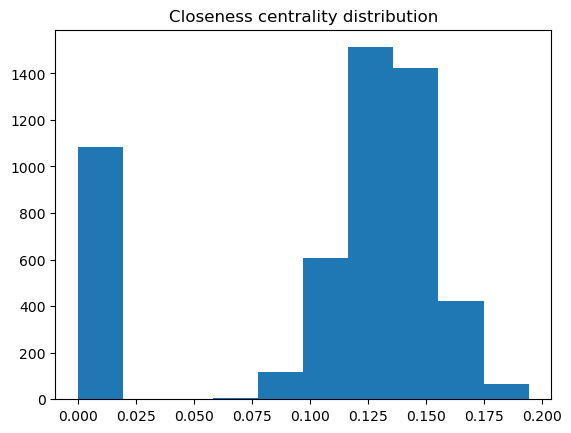

In [10]:
plt.hist(collabCentralityCloseness.values())
plt.title("Closeness centrality distribution")
plt.show()

In [11]:
#betweeness centrality
collabCentralityBetweeness = nx.betweenness_centrality(collabGraph)

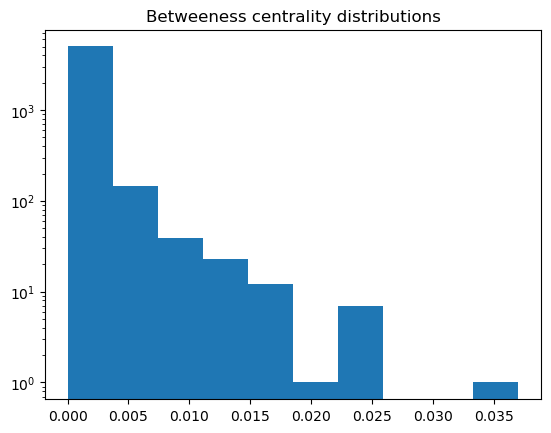

In [12]:
plt.hist(collabCentralityBetweeness.values(), log=True)
plt.title("Betweeness centrality distributions")
plt.show()

In [13]:
# longest shortest path for each node and graph diameter for biggest connected component

graphDiameter = nx.diameter( collabGraph.subgraph(max(nx.connected_components(collabGraph), key=len)).copy() )
print("Diameter of the graph: " + str(graphDiameter))

Diameter of the graph: 17


In [26]:
#check the small world problem
print(graphDiameter / np.log(len(collabGraph.nodes())))
#verified as diameter is in the same order of size
#checking also for average path length
print(nx.average_shortest_path_length( collabGraph.subgraph(max(nx.connected_components(collabGraph), key=len)).copy() ) /  np.log(len(collabGraph.nodes())))
#verified also for average path length

1.9849474698821234
0.7063353857339955


In [22]:
#clustering coefficent of evry node (and network clustering coefficent)

clusteringCoefficents = []
for node in collabGraph.nodes():
    clusteringCoefficents.append(nx.clustering(collabGraph, node))

print("Average clustering coefficent: " + str(sum(clusteringCoefficents) / collabGraph.number_of_nodes()))

Average clustering coefficent: 0.529635811052136


## Community detection simulation